Closed World scenario

In [9]:
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류 알고리즘
import pandas as pd
from sklearn.decomposition import PCA

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# monitored dataset 불러오기 -> 유미가 보낸 csv? 에다가 해당되는class label도 같이 나오게 csv 새로 받아야할
monitored=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/closed.csv")
monitored.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,0


In [12]:

# 정답값 아닌 애들 분리
X= monitored.drop('y', axis=1)
# 목표변수 분리(정답값. 어느 클래스 label에 해당하는지 해당 열)
y = monitored['y']


In [13]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state = 1)

# 데이터 스케일링(normalize data)

# 표준 스케일러(평균 0, 분산 1)
#scaler = StandardScaler()
#X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [ ]:
# PCA를 사용하여 데이터 차원 축소
#n_components = 0  # 상황에 따라 조절
#pca = PCA(n_components=n_components)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [14]:
clf2 = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

accuracy_score :  0.765438596491228


In [15]:
# GridSearch로 최적의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 150, 200],
          'max_depth' : [20, 40, 60, 70],
          'min_samples_leaf' : [1, 2, 4, 6],
          'min_samples_split' : [2, 4, 6],
          #'criterion' : ['gini', 'entropy']
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 221, n_jobs = -1)
grid = GridSearchCV(rf_clf, params, refit = True, verbose = 3, cv=3)
grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid.best_params_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.747 total time=   8.8s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.735 total time=   5.0s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.741 total time=   6.0s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.751 total time=  10.9s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.737 total time=   8.4s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.743 total time=  10.5s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.750 total time=  13.9s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.739 total time= 

In [16]:
# 위의 결과로 나온 최적 하이퍼 파라미터로 테스트 세트 데이터에서 예측 성능을 측정

y_pred = grid.predict(X_test)
print('예측 정확도: {:.4f}'.format(grid.best_score_))
print('test 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('오차 행렬')
print(confusion_matrix( y_test, y_pred))
print(classification_report(y_test, y_pred))



예측 정확도: 0.7454
test 정확도: 0.7670
오차 행렬
[[35  0  0 ...  0  1  0]
 [ 0 42  2 ...  0  0  0]
 [ 0  1 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  4]
 [ 0  0  0 ...  0 49  0]
 [ 1  0  0 ...  0  0 37]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        60
           1       0.75      0.67      0.71        63
           2       0.76      0.88      0.81        57
           3       0.88      0.90      0.89        58
           4       0.82      0.78      0.80        63
           5       0.89      0.90      0.90        52
           6       0.84      0.88      0.86        56
           7       0.70      0.95      0.81        60
           8       0.74      0.86      0.80        50
           9       0.71      0.78      0.74        68
          10       0.83      0.72      0.77        53
          11       0.69      0.67      0.68        51
          12       0.84      0.92      0.88        52
          13       0.63      0.49      0.55      

In [17]:
# feature names 뽑기(header 제외)
a=monitored.drop(['y'], axis=1)
column_headers=list(a.columns.values)

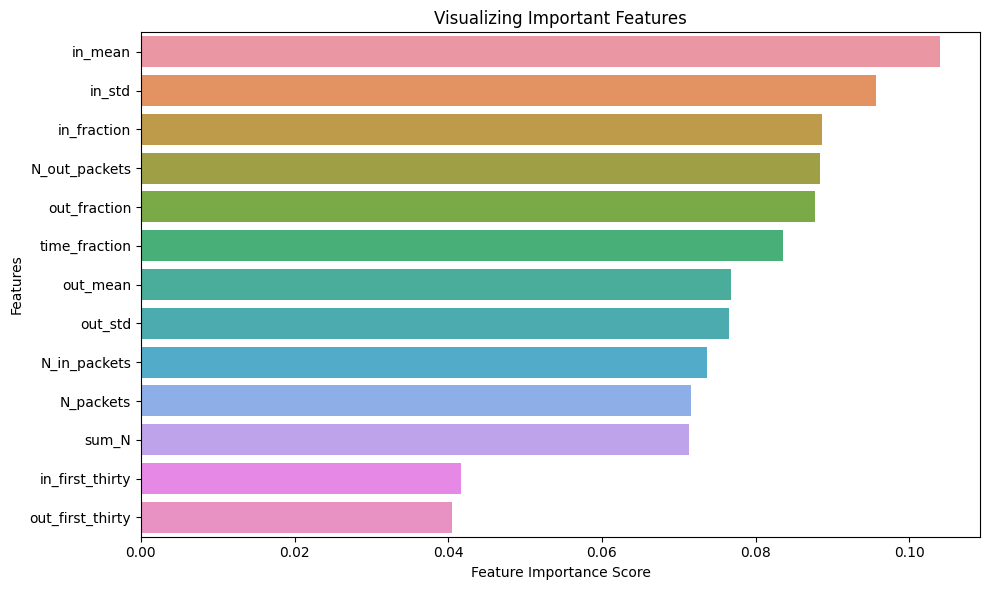

In [18]:
# 5. Report the feature rankings with importance scores using the bar plot using barplot provided by seaborn library.

import seaborn as sns
import matplotlib.pyplot as plt


feature_imp = pd.Series(grid.best_estimator_.feature_importances_, index=column_headers).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()